In [84]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import missingno as ms
import warnings
warnings.filterwarnings('ignore')

In [85]:
#merge 2017 college and 2018 combine
# 2017 college data
rbu17 = pd.read_excel("/Users/rickykuehn/Desktop/UCLA/Intensive/Capstone Project/College data/college_2017.xlsx")
rbu17['Player'] = rbu17['Player'].str.replace('*','')
rbu17.rename(columns = {'G':'col_G'}, inplace = True)
rbu17 = rbu17.drop(columns=['Rk'])
rbu17.info()

#2018 running back combine data
url = 'https://nflcombineresults.com/nflcombinedata_expanded.php?year=2018&pos=RB&college='
response = requests.get(url)
response.content                
soup = BeautifulSoup(response.text)
rbcombine2018 = soup.find('table')
rbc18 = pd.read_html(str(rbcombine2018))[0]
rbc18.rename(columns = {'Name':'Player'}, inplace = True)
rbc18.info()

#2018 advanced NFL data
NFL18 = pd.read_excel("/Users/rickykuehn/Desktop/UCLA/Intensive/Capstone Project/NFL advanced data/advancedNFL_2018.xlsx")
NFL18['Player'] = NFL18['Player'].str.replace('*','')
NFL18['Player'] = NFL18['Player'].str.replace('+','')
NFL18.rename(columns = {'Tm':'NFL_Tm'}, inplace = True)
NFL18.rename(columns = {'G':'NFL_G'}, inplace = True)
NFL18.rename(columns = {'GS':'NFL_GS'}, inplace = True)
NFL18.rename(columns = {'Att':'NFL_Att'}, inplace = True)
NFL18.rename(columns = {'Yds':'NFL_Yds'}, inplace = True)
NFL18.rename(columns = {'1D':'NFL_1D'}, inplace = True)
NFL18.rename(columns = {'YBC':'NFL_YBC'}, inplace = True)
NFL18.rename(columns = {'YBC/Att':'NFL_YBC/Att'}, inplace = True)
NFL18.rename(columns = {'YAC':'NFL_YAC'}, inplace = True)
NFL18.rename(columns = {'YAC/Att':'NFL_YAC/Att'}, inplace = True)
NFL18.rename(columns = {'BrkTkl':'NFL_BrkTkl'}, inplace = True)
NFL18.rename(columns = {'Att/Br':'NFL_Att/Br'}, inplace = True)
NFL18 = NFL18.drop(columns=['Rk'])
NFL18.info()

#merge 2017 college and 2018 combine
rbu17c18 = pd.merge(rbc18, rbu17, on = 'Player')
print(rbu17c18)

#merge college/combine with 2018 NFL adv and 2018 ProBowl
rb_exp1a = pd.merge(rbu17c18, NFL18, on = 'Player')
rb_exp1a.info()

mis = rb_exp1a.isna().sum()
mis_per = rb_exp1a.isna().sum()/len(rb_exp1a)*100
mis_per

#remove variables with high na percentage
rb_exp1a = rb_exp1a.drop(labels=["60Yd Shuttle", "Wonderlic", "Pos"], axis=1)
rb_exp1a.info()

#remove irrelevant variables
rb_exp1a = rb_exp1a.drop(labels=["Year", "POS", "College"], axis=1)
rb_exp1a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     281 non-null    object 
 1   School     281 non-null    object 
 2   Conf       281 non-null    object 
 3   col_G      281 non-null    int64  
 4   Rush Att   281 non-null    int64  
 5   Rush Yds▼  281 non-null    int64  
 6   Rush Avg   281 non-null    float64
 7   Rush TD    281 non-null    int64  
 8   Rec        281 non-null    int64  
 9   Rec Yds    281 non-null    int64  
 10  Rec Avg    241 non-null    float64
 11  Rec TD     281 non-null    int64  
 12  Plays      281 non-null    int64  
 13  Scrim Yds  281 non-null    int64  
 14  Scrim Avg  281 non-null    float64
 15  Scrim TD   281 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 35.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 16 columns):
 #   Col

In [86]:
# steps to get rb_exp1a should be repeated for other years/players

In [87]:
#merge 2018 college and 2019 combine
# 2018 college data
rbu18 = pd.read_excel("/Users/rickykuehn/Desktop/UCLA/Intensive/Capstone Project/College data/college_2018.xlsx")
rbu18['Player'] = rbu18['Player'].str.replace('*','')
rbu18.rename(columns = {'G':'col_G'}, inplace = True)
rbu18 = rbu18.drop(columns=['Rk'])
rbu18.info()

#2019 running back combine data
url = 'https://nflcombineresults.com/nflcombinedata_expanded.php?year=2019&pos=RB&college='
response = requests.get(url)
response.content                
soup = BeautifulSoup(response.text)
rbcombine2019 = soup.find('table')
rbc19 = pd.read_html(str(rbcombine2019))[0]
rbc19.rename(columns = {'Name':'Player'}, inplace = True)
rbc19.info()

#2019 advanced NFL data
NFL19 = pd.read_excel("/Users/rickykuehn/Desktop/UCLA/Intensive/Capstone Project/NFL data/advancedNFL_2019.xlsx")
NFL19['Player'] = NFL19['Player'].str.replace('*','')
NFL19['Player'] = NFL19['Player'].str.replace('+','')
NFL19.rename(columns = {'Tm':'NFL_Tm'}, inplace = True)
NFL19.rename(columns = {'G':'NFL_G'}, inplace = True)
NFL19.rename(columns = {'GS':'NFL_GS'}, inplace = True)
NFL19.rename(columns = {'Att':'NFL_Att'}, inplace = True)
NFL19.rename(columns = {'Yds':'NFL_Yds'}, inplace = True)
NFL19.rename(columns = {'1D':'NFL_1D'}, inplace = True)
NFL19.rename(columns = {'YBC':'NFL_YBC'}, inplace = True)
NFL19.rename(columns = {'YBC/Att':'NFL_YBC/Att'}, inplace = True)
NFL19.rename(columns = {'YAC':'NFL_YAC'}, inplace = True)
NFL19.rename(columns = {'YAC/Att':'NFL_YAC/Att'}, inplace = True)
NFL19.rename(columns = {'BrkTkl':'NFL_BrkTkl'}, inplace = True)
NFL19.rename(columns = {'Att/Br':'NFL_Att/Br'}, inplace = True)
NFL19 = NFL19.drop(columns=['Rk'])
NFL19.info()

#merge 2018 college and 2019 combine
rbu18c19 = pd.merge(rbc19, rbu18, on = 'Player')
print(rbu18c19)

#merge college/combine with 2019 NFL adv and 2019 ProBowl
rb_exp1b = pd.merge(rbu18c19, NFL19, on = 'Player')
rb_exp1b.info()

mis = rb_exp1b.isna().sum()
mis_per = rb_exp1b.isna().sum()/len(rb_exp1b)*100
mis_per

#remove variables with high na percentage
rb_exp1b = rb_exp1b.drop(labels=["60Yd Shuttle", "Wonderlic", "Pos"], axis=1)
rb_exp1b.info()

#remove irrelevant variables
rb_exp1b = rb_exp1b.drop(labels=["Year", "POS", "College"], axis=1)
rb_exp1b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     290 non-null    object 
 1   School     290 non-null    object 
 2   Conf       290 non-null    object 
 3   col_G      290 non-null    int64  
 4   Rush Att   290 non-null    int64  
 5   Rush Yds▼  290 non-null    int64  
 6   Rush Avg   290 non-null    float64
 7   Rush TD    290 non-null    int64  
 8   Rec        290 non-null    int64  
 9   Rec Yds    290 non-null    int64  
 10  Rec Avg    241 non-null    float64
 11  Rec TD     290 non-null    int64  
 12  Plays      290 non-null    int64  
 13  Scrim Yds  290 non-null    int64  
 14  Scrim Avg  290 non-null    float64
 15  Scrim TD   290 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 36.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 16 columns):
 #   Col

FileNotFoundError: [Errno 2] No such file or directory: '/Users/rickykuehn/Desktop/UCLA/Intensive/Capstone Project/NFL data/advancedNFL_2019.xlsx'

In [ ]:
#merge 2019 college and 2020 combine
# 2019 college data
rbu19 = pd.read_excel("/Users/rickykuehn/Desktop/UCLA/Intensive/Capstone Project/College data/college_2019.xlsx")
rbu19['Player'] = rbu19['Player'].str.replace('*','')
rbu19.rename(columns = {'G':'col_G'}, inplace = True)
rbu19 = rbu19.drop(columns=['Rk'])
rbu19.info()

#2020 running back combine data
url = 'https://nflcombineresults.com/nflcombinedata_expanded.php?year=2020&pos=RB&college='
response = requests.get(url)
response.content                
soup = BeautifulSoup(response.text)
rbcombine2020 = soup.find('table')
rbc20 = pd.read_html(str(rbcombine2020))[0]
rbc20.rename(columns = {'Name':'Player'}, inplace = True)
rbc20.info()

#2020 advanced NFL data
NFL20 = pd.read_excel("/Users/rickykuehn/Desktop/UCLA/Intensive/Capstone Project/NFL advanced data/advancedNFL_2020.xlsx")
NFL20['Player'] = NFL20['Player'].str.replace('*','')
NFL20['Player'] = NFL20['Player'].str.replace('+','')
NFL20.rename(columns = {'Tm':'NFL_Tm'}, inplace = True)
NFL20.rename(columns = {'G':'NFL_G'}, inplace = True)
NFL20.rename(columns = {'GS':'NFL_GS'}, inplace = True)
NFL20.rename(columns = {'Att':'NFL_Att'}, inplace = True)
NFL20.rename(columns = {'Yds':'NFL_Yds'}, inplace = True)
NFL20.rename(columns = {'1D':'NFL_1D'}, inplace = True)
NFL20.rename(columns = {'YBC':'NFL_YBC'}, inplace = True)
NFL20.rename(columns = {'YBC/Att':'NFL_YBC/Att'}, inplace = True)
NFL20.rename(columns = {'YAC':'NFL_YAC'}, inplace = True)
NFL20.rename(columns = {'YAC/Att':'NFL_YAC/Att'}, inplace = True)
NFL20.rename(columns = {'BrkTkl':'NFL_BrkTkl'}, inplace = True)
NFL20.rename(columns = {'Att/Br':'NFL_Att/Br'}, inplace = True)
NFL20 = NFL20.drop(columns=['Rk'])
NFL20.info()

#merge 2019 college and 2020 combine
rbu19c20 = pd.merge(rbc20, rbu19, on = 'Player')
print(rbu19c20)

#merge college/combine with 2020 NFL adv and 2020 ProBowl
rb_exp1c = pd.merge(rbu19c20, NFL20, on = 'Player')
rb_exp1c.info()

mis = rb_exp1c.isna().sum()
mis_per = rb_exp1c.isna().sum()/len(rb_exp1c)*100
mis_per

#remove variables with high na percentage
rb_exp1c = rb_exp1c.drop(labels=["60Yd Shuttle", "Wonderlic", "Pos"], axis=1)
rb_exp1c.info()

#remove irrelevant variables
rb_exp1c = rb_exp1c.drop(labels=["Year", "POS", "College"], axis=1)
rb_exp1c.info()

In [88]:
#Import NFL 2021 data to find ProBowl21
NFL21 = pd.read_excel("/Users/rickykuehn/Desktop/UCLA/Intensive/Capstone Project/NFL advanced data/advancedNFL_2021.xlsx")
NFL21['Player'] = NFL21['Player'].str.replace('*','')
NFL21['Player'] = NFL21['Player'].str.replace('+','')
ProBowl21 = NFL21[["Player","ProBowl21"]]
print(ProBowl21)

                Player  ProBowl21
0      Jonathan Taylor          1
1         Najee Harris          0
2            Joe Mixon          1
3       Antonio Gibson          0
4          Dalvin Cook          1
..                 ...        ...
366       Quez Watkins          0
367         Derek Watt          0
368   Preston Williams          0
369     Andrew Wingard          0
370  Olamide Zaccheaus          0

[371 rows x 2 columns]


In [76]:
#Isolate all ProBowl data into new dataframes
ProBowl20 = NFL20[["Player","ProBowl20"]]
ProBowl19 = NFL19[["Player","ProBowl19"]]

In [77]:
#Attach 2nd season ProBowl data to corresponding players
rb_exp1a = pd.merge(rb_exp1a, ProBowl19, on = 'Player')
rb_exp1b = pd.merge(rb_exp1b, ProBowl20, on = 'Player')
rb_exp1c = pd.merge(rb_exp1c, ProBowl21, on = 'Player')

rb_exp1a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             15 non-null     float64
 1   Player           15 non-null     object 
 2   College          15 non-null     object 
 3   POS              15 non-null     object 
 4   Height (in)      15 non-null     float64
 5   Weight (lbs)     15 non-null     float64
 6   Hand Size (in)   15 non-null     float64
 7   Arm Length (in)  15 non-null     float64
 8   40 Yard          15 non-null     float64
 9   Bench Press      15 non-null     float64
 10  Vert Leap (in)   14 non-null     float64
 11  Broad Jump (in)  13 non-null     float64
 12  Shuttle          13 non-null     float64
 13  3Cone            11 non-null     float64
 14  School           15 non-null     object 
 15  Conf             15 non-null     object 
 16  col_G            15 non-null     int64  
 17  Rush Att         1

In [44]:
rb_exp1b.head()

,Player,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,...,NFL_Yds,NFL_1D,NFL_YBC,NFL_YBC/Att,NFL_YAC,NFL_YAC/Att,NFL_BrkTkl,NFL_Att/Br,ProBowl19,ProBowl20
0,Myles Gaskin,69.25,205.0,8.75,29.50,4.58,24.0,35.5,118.0,4.27,...,133,7.0,28,0.8,105,2.9,0,NaN,0,0
1,Damien Harris,70.13,216.0,9.75,30.75,4.57,16.0,37.0,121.0,NaN,...,12,NaN,8,2.0,4,1.0,0,NaN,0,0
2,Darrell Henderson,68.38,208.0,8.63,31.00,4.49,22.0,33.5,121.0,4.41,...,147,10.0,84,2.2,63,1.6,7,5.6,0,0
3,Justice Hill,69.63,198.0,9.50,31.63,4.40,21.0,40.0,130.0,NaN,...,225,10.0,125,2.2,100,1.7,3,19.3,0,0
4,Travis Homer,70.38,201.0,10.00,31.50,4.48,17.0,39.5,130.0,4.31,...,114,6.0,82,4.6,32,1.8,0,NaN,0,0


In [45]:
rb_exp1c.head()

,Player,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,...,NFL_Yds,NFL_1D,NFL_YBC,NFL_YBC/Att,NFL_YAC,NFL_YAC/Att,NFL_BrkTkl,NFL_Att/Br,ProBowl20,ProBowl21
0,Salvon Ahmed,70.88,197.0,8.75,29.25,4.62,NaN,34.5,120.0,NaN,...,319,18.0,245,3.3,74,1.0,4,18.8,0,0
1,Cam Akers,70.38,217.0,9.00,30.63,4.47,20.0,35.5,122.0,4.42,...,625,26.0,321,2.2,304,2.1,6,24.2,0,0
2,Clyde Edwards-Helaire,67.25,207.0,9.63,29.00,4.60,15.0,39.5,123.0,NaN,...,803,39.0,419,2.3,384,2.1,15,12.1,0,0
3,Darrynton Evans,70.13,203.0,9.25,31.63,4.41,20.0,37.0,125.0,NaN,...,54,2.0,29,2.1,25,1.8,0,NaN,0,0
4,Joshua Kelley,70.63,212.0,9.63,31.63,4.49,23.0,31.0,121.0,4.28,...,354,20.0,184,1.7,170,1.5,7,15.9,0,0


In [46]:
#Rename ProBowl columns
rb_exp1a.rename(columns = {'ProBowl18':'ProBowlS1'}, inplace = True)
rb_exp1a.rename(columns = {'ProBowl19':'ProBowlS2'}, inplace = True)
rb_exp1b.rename(columns = {'ProBowl19':'ProBowlS1'}, inplace = True)
rb_exp1b.rename(columns = {'ProBowl20':'ProBowlS2'}, inplace = True)
rb_exp1c.rename(columns = {'ProBowl20':'ProBowlS1'}, inplace = True)
rb_exp1c.rename(columns = {'ProBowl21':'ProBowlS2'}, inplace = True)

In [47]:
#Concatenate
rb_exp1a1b = pd.concat([rb_exp1a, rb_exp1b])
rb_exp1abc = pd.concat([rb_exp1a1b, rb_exp1c])

In [48]:
rb_exp1abc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 10
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           39 non-null     object 
 1   Height (in)      39 non-null     float64
 2   Weight (lbs)     39 non-null     float64
 3   Hand Size (in)   39 non-null     float64
 4   Arm Length (in)  39 non-null     float64
 5   40 Yard          39 non-null     float64
 6   Bench Press      36 non-null     float64
 7   Vert Leap (in)   38 non-null     float64
 8   Broad Jump (in)  36 non-null     float64
 9   Shuttle          30 non-null     float64
 10  3Cone            26 non-null     float64
 11  School           39 non-null     object 
 12  Conf             39 non-null     object 
 13  col_G            39 non-null     int64  
 14  Rush Att         39 non-null     int64  
 15  Rush Yds▼        39 non-null     int64  
 16  Rush Avg         39 non-null     float64
 17  Rush TD          3

In [49]:
#Count values in categorical columns
rb_exp1abc['School'].value_counts()

Georgia                 3
Notre Dame              2
Penn State              2
Washington              2
LSU                     2
Ole Miss                2
Utah State              1
Pitt                    1
Nebraska                1
Florida Atlantic        1
Florida State           1
Boise State             1
Appalachian State       1
UCLA                    1
Utah                    1
Arizona                 1
Wisconsin               1
Iowa State              1
Memphis                 1
Miami (FL)              1
Oklahoma State          1
Arizona State           1
Alabama                 1
Southern Mississippi    1
San Diego State         1
Colorado                1
Tennessee               1
Auburn                  1
Northwestern            1
North Carolina State    1
Oregon                  1
Vanderbilt              1
Name: School, dtype: int64

In [50]:
rb_exp1abc['NFL_Tm'].value_counts()

LAR    3
KAN    3
MIA    3
IND    3
NWE    3
PHI    2
BUF    2
SEA    2
ATL    2
DET    2
LAC    2
DEN    2
CLE    1
BAL    1
MIN    1
CHI    1
JAX    1
NYG    1
GNB    1
TEN    1
HOU    1
TAM    1
Name: NFL_Tm, dtype: int64

In [51]:
rb_exp1abc['Conf'].value_counts()

SEC         11
Pac-12       8
Big Ten      5
ACC          4
MWC          3
Ind          2
CUSA         2
Big 12       2
American     1
Sun Belt     1
Name: Conf, dtype: int64

In [52]:
#remove 'School' and use one-hot encoding for 'Conf'
rb_exp1abc = rb_exp1abc.drop(labels=["School", "NFL_Tm"], axis=1)
rb_exp1abc = pd.get_dummies(rb_exp1abc, columns=['Conf'])
rb_exp1abc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 10
Data columns (total 48 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           39 non-null     object 
 1   Height (in)      39 non-null     float64
 2   Weight (lbs)     39 non-null     float64
 3   Hand Size (in)   39 non-null     float64
 4   Arm Length (in)  39 non-null     float64
 5   40 Yard          39 non-null     float64
 6   Bench Press      36 non-null     float64
 7   Vert Leap (in)   38 non-null     float64
 8   Broad Jump (in)  36 non-null     float64
 9   Shuttle          30 non-null     float64
 10  3Cone            26 non-null     float64
 11  col_G            39 non-null     int64  
 12  Rush Att         39 non-null     int64  
 13  Rush Yds▼        39 non-null     int64  
 14  Rush Avg         39 non-null     float64
 15  Rush TD          39 non-null     int64  
 16  Rec              39 non-null     float64
 17  Rec Yds          3

<AxesSubplot:>

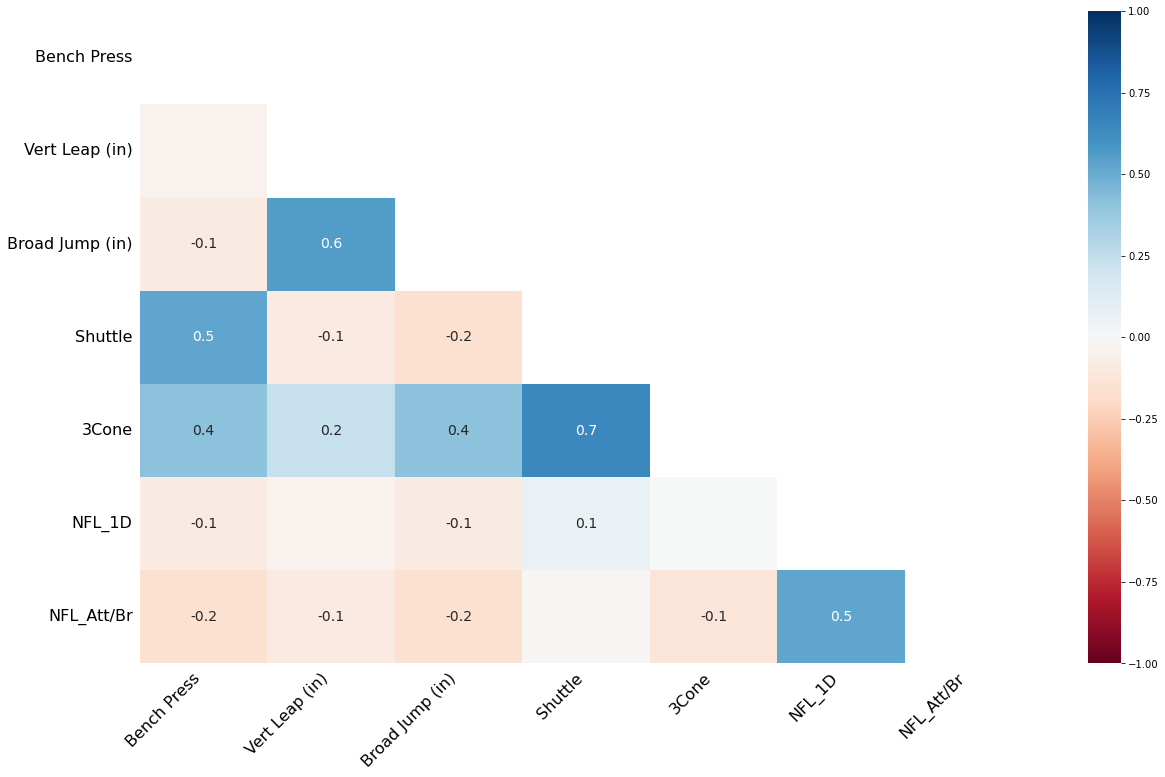

In [53]:
#Correlation
import missingno as ms
ms.heatmap(rb_exp1abc)

In [54]:
#NA analysis
mis2 = rb_exp1abc.isna().sum()
mis2_per = rb_exp1abc.isna().sum()/len(rb_exp1abc)*100
mis2_per

Player              0.000000
Height (in)         0.000000
Weight (lbs)        0.000000
Hand Size (in)      0.000000
Arm Length (in)     0.000000
40 Yard             0.000000
Bench Press         7.692308
Vert Leap (in)      2.564103
Broad Jump (in)     7.692308
Shuttle            23.076923
3Cone              33.333333
col_G               0.000000
Rush Att            0.000000
Rush Yds▼           0.000000
Rush Avg            0.000000
Rush TD             0.000000
Rec                 0.000000
Rec Yds             0.000000
Rec Avg             0.000000
Rec TD              0.000000
Plays               0.000000
Scrim Yds           0.000000
Scrim Avg           0.000000
Scrim TD            0.000000
Age                 0.000000
NFL_G               0.000000
NFL_GS              0.000000
NFL_Att             0.000000
NFL_Yds             0.000000
NFL_1D              7.692308
NFL_YBC             0.000000
NFL_YBC/Att         0.000000
NFL_YAC             0.000000
NFL_YAC/Att         0.000000
NFL_BrkTkl    

<AxesSubplot:>

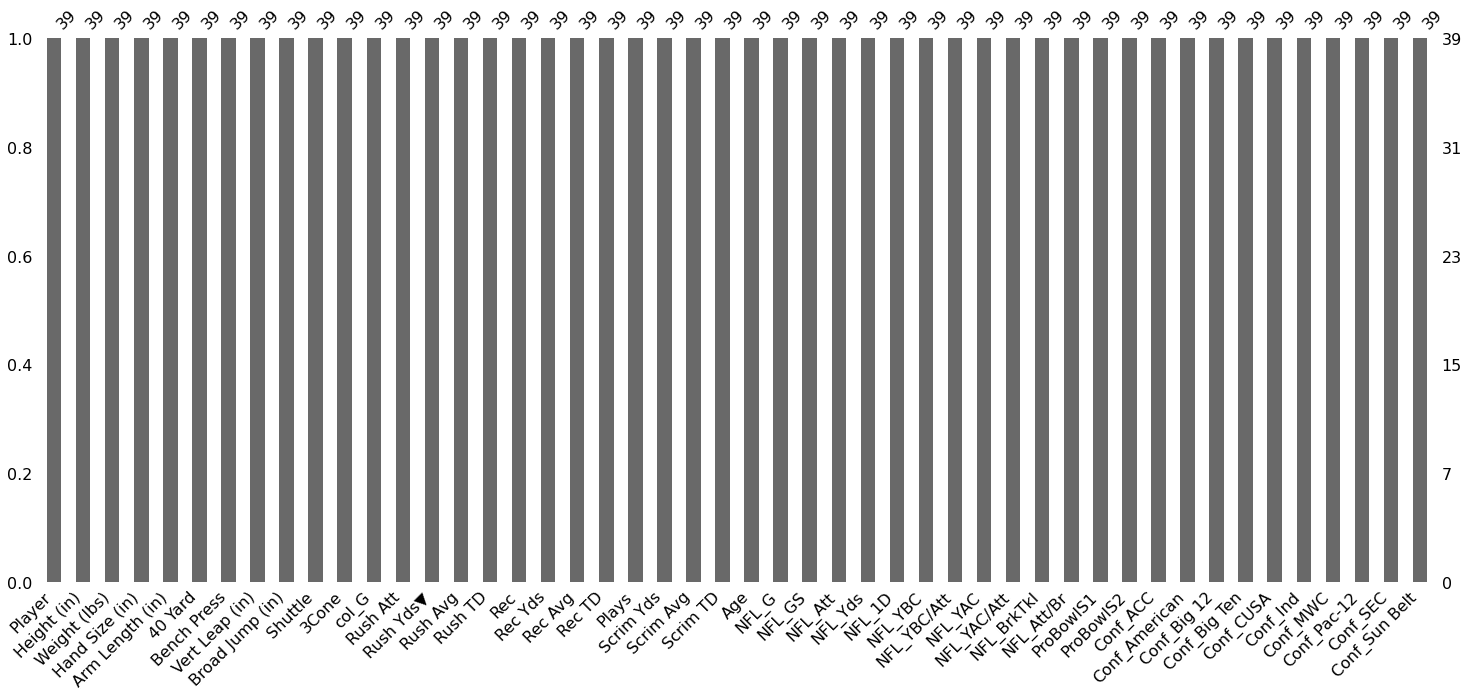

In [69]:
#Interpolate
rb_exp1abc = rb_exp1abc.sort_values('Player')
rb_exp1d = rb_exp1abc.interpolate(method='linear')
ms.bar(rb_exp1d)

In [70]:
print(rb_exp1d)
rb_exp1d.to_excel('rb_exp1d.xlsx', sheet_name='sheet1', index=False)

                   Player  Height (in)  Weight (lbs)  Hand Size (in)  \
5      Alexander Mattison        70.88         221.0            9.13   
1               Cam Akers        70.38         217.0            9.00   
2   Clyde Edwards-Helaire        67.25         207.0            9.63   
7           D'Andre Swift        68.25         212.0            9.00   
1           Damien Harris        70.13         216.0            9.75   
14        Darrel Williams        71.63         225.0            9.38   
2       Darrell Henderson        68.38         208.0            8.63   
3         Darrynton Evans        70.13         203.0            9.25   
11        Darwin Thompson        68.00         198.0            8.38   
6        David Montgomery        70.13         222.0            9.25   
10       Devin Singletary        67.63         203.0            8.50   
8           Devine Ozigbo        70.75         222.0            9.25   
12        Dexter Williams        71.13         212.0            

In [71]:
#regression 1
y = rb_exp1d[['ProBowlS2']]
x = rb_exp1d.drop(['Player', 'ProBowlS2'], axis=1)
X = sm.add_constant(x) 
logit = sm.Logit(y,X)
eq01=logit.fit()
print(eq01.summary())

PerfectSeparationError: Perfect separation detected, results not available

In [91]:
rb_exp1d['ProBowlS2'].value_counts()

0    37
1     2
Name: ProBowlS2, dtype: int64

Error! Too many rows with 0, not enough with 1
So, back to the drawing board....
Need to find a new 'y' that measures a running back's success